# Image blurring

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Read in an image.  PNG are easily supported, but the Python package PIL handles other formats.

Simply using `imread` and `imshow` will reveal that the image is in color (CMYK color space).  This will be a $500\times 500\times 4$ double array.  But let's collapse it by adding all of the colors.

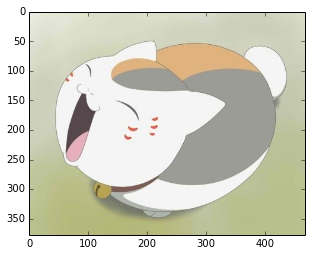

In [2]:
I = plt.imread('natsume.png')
plt.imshow(I)

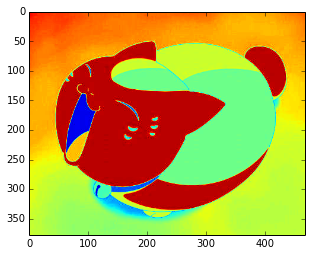

In [3]:
I = I.sum(axis=-1)
plt.imshow(I)

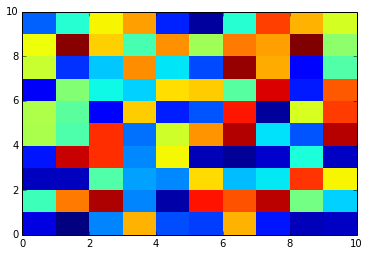

In [16]:
A = np.random.rand(10,10)
plt.pcolor(A)

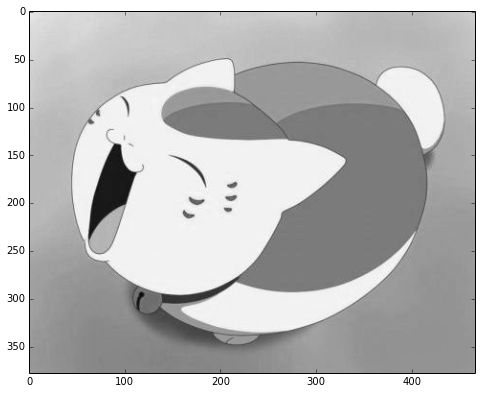

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(I, cmap="gray")

Let's try something.  Let's go to every pixel in the image a rewrite the grayscale of that pixel as the weighted average of its neighbors:
$$
    pixel \leftarrow \frac{1}{8}\left( 4 pixel + pixel_{north} + pixel_{south} + pixel_{west} + pixel_{east}\right)
$$

In [5]:
def blur(I):
    for i in range(1,I.shape[0]-1):
        for j in range(1,I.shape[1]-1):
            I[i,j] = (4*I[i,j] + I[i-1,j] + I[i+1,j] + I[i,j-1] + I[i,j+1])/8.0
    return I

Now time it!

In [19]:
#%timeit blur(I)

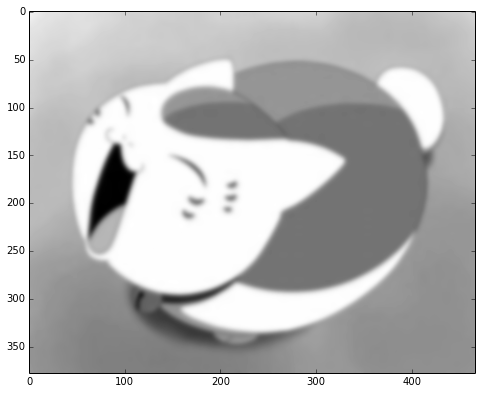

In [21]:
blur(I)
blur(I)
blur(I)
blur(I)
blur(I)
blur(I)
blur(I)
blur(I)
blur(I)
plt.figure(figsize=(8,8))
plt.imshow(I, cmap="gray")

Ok, this is fine, but we can do it as an "array" operation instead of two loops. Check it out.

In [9]:
A = np.arange(0,25).reshape((5,5))
print(A)
idx = np.arange(1,4)
print(idx)
print(A[:,idx][idx,:])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[1 2 3]
[[ 6  7  8]
 [11 12 13]
 [16 17 18]]


In [10]:
def blur2(I):
    idx = np.arange(1,I.shape[1]-1,dtype=int)
    I[:,idx][idx,:] = (5*I[:,idx][idx,:] + I[:,idx-1][idx,:] + I[:,idx+1][idx,:] + I[:,idx][idx-1,:] + I[:,idx][idx+1,:])
    return I

In [11]:
#%timeit blur2(I)

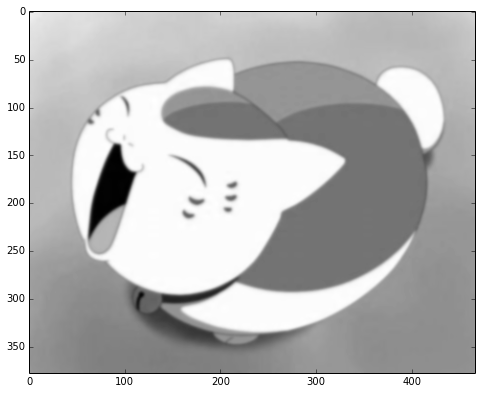

In [12]:
blur(I)
blur(I)
blur(I)
plt.figure(figsize=(8,8))
plt.imshow(I, cmap="gray")